In [4]:
import numpy as np
from itertools import permutations, product
import matplotlib.pyplot as plt

# U is input data
def generate_mixed_sources(U, d, m, random_state=None):
    rng = np.random.default_rng(random_state)
    """
    N : int
        Number of samples per source.
    d : int
        Number of sources (dimensions of input).
    m : int
        Number of mixtures (rows of mixing matrix A).
    
    U should be d by N.
    """
    # Generate a random matrix for A
    A = rng.standard_normal(size=(m, d))
    Q, _ = np.linalg.qr(A)
    A = Q[:m, :d]
    X = A @ U  # shape (m, N)
    
    
    return U, X, A

def normalise(X):
    row_norms = np.linalg.norm(X, axis=1, keepdims=True)
    return X / row_norms

def activation(x):
    return np.clip(x, -np.sqrt(3), np.sqrt(3))

def clip(W):
    for row in W:
        norm = np.linalg.norm(row)
        if norm < 1:
            row /= norm
    return W

def initialize_w(d,m):
# This function initializes weights of the network
# Input:
#  N - number of neurons (in input and hidden layers)
# Outputs:
#  w1f - forward weights generated randomly and normalized
#  w1s - lateral weights to soma initialized to 0
    w1f = np.random.randn (d,m)
    w1f = normalise (w1f)
    w1s = np.zeros ((d,d))
    var = np.zeros(d)
    return w1f, w1s,var

def relax (x0, w1f, w1s, var, d, m):
# Relaxation of the network
# Inputs:
#  x0 - fixed values of input layer
#  w1f - forward weights
#  w1s - somatic lateral weights
# Output:
#  x - activity of all neurons
    x0 = x0.reshape(m, 1)
    x = [x0, np.zeros((d,1))]
    MAXITER = 50
    REQDIF = 0.000001
    iteration = 0
    oldx1 = np.zeros((d,1))
    dif = 100
    v1f = w1f @ x[0]
    while dif > REQDIF and iteration < MAXITER:
        iteration = iteration + 1
        x[1] = (v1f - w1s @ x[1])
        dif = np.sum((x[1]-oldx1)**2)
        oldx1 = x[1]
    if iteration==MAXITER:
        print("ERROR!")
    x[1] = x[1] / (2*var[:, None] - 1)
    x[1] = activation(x[1])
    return x

def update_w (x, w1f, w1s, var, alpha=0.01):
# Update of the weights
# Inputs
#  x - activity of all neurons
#  w1f - forward weights
#  w1s - somatic lateral weights
#  alpha - learning rate
# Outputs: w1f, w1s
    e1f = x[1] - w1f @ x[0]
    w1f = w1f + alpha * e1f @ x[0].transpose()
    w1f = normalise (w1f)
    w1f = clip(w1f)
    w1s = (1-alpha) * w1s + alpha * x[1] @ x[1].transpose()
    np.fill_diagonal (w1s, 0)
    var = (1-alpha) * var + alpha * np.array(x[1]**2).flatten()
    return w1f, w1s, var

In [5]:
from PIL import Image
import os

# Load JPG images from directory
image_dir = "images"  # Change this to your images directory path
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg'))]

# Convert images to lists
images_list = []
for img_file in sorted(image_files):
    img_path = os.path.join(image_dir, img_file)
    img = Image.open(img_path)
    img_array = np.array(img)
    img_array = img_array.reshape(-1)
    print(np.mean(img_array))
    normalised_img = (img_array - np.mean(img_array)) / np.std(img_array)
    images_list.append(normalised_img)
    print(f"Loaded {img_file}: shape {img_array.shape}")

print(f"\nTotal images loaded: {len(images_list)}")

107.0276387532552
Loaded Asmall.jpg: shape (196608,)
112.63822937011719
Loaded Bsmall.jpg: shape (196608,)
88.13530985514323
Loaded Csmall.jpg: shape (196608,)
104.90031209514555
Loaded DSCN5237.JPG: shape (41990400,)
136.20495353699894
Loaded DSCN5247.JPG: shape (41990400,)
132.15038813633592
Loaded DSCN5268.JPG: shape (41990400,)
94.01798913561196
Loaded DSCN5320.JPG: shape (41990400,)
158.67158657693187
Loaded DSCN5332.JPG: shape (41990400,)
159.06467611644567
Loaded DSCN5365.JPG: shape (41990400,)
94.5445957885612
Loaded DSCN5384.JPG: shape (41990400,)
96.44876717083439
Loaded IMG-1121.JPG: shape (36578304,)
112.15865877761856
Loaded IMG-1122.JPG: shape (36578304,)
105.0474010768788
Loaded IMG-1123.JPG: shape (36578304,)
96.47796508006495
Loaded IMG_0361.JPG: shape (36578304,)
133.94027732942456
Loaded IMG_1126.JPG: shape (36578304,)
136.3854966321019
Loaded IMG_1133.JPG: shape (36578304,)
130.8697000276448
Loaded IMG_1134.JPG: shape (36578304,)

Total images loaded: 17


current best snr 0: 1.626065199100055
current best snr 1: 1.626065199100055
current best snr 2: 1.6260651991000528
current best snr 3: 1.626065199100055
current best snr 4: 1.626065199100055
current best snr 5: 1.626065199100055
current best snr 6: 1.626065199100055
current best snr 7: 1.626065199100055
current best snr 8: 1.626065199100055
current best snr 9: 1.626065199100055
[[ 9.33640780e-01  1.93268097e-01  1.36867714e-01]
 [-1.48048097e-17 -8.75981008e-17 -7.34637409e-18]
 [ 1.62281989e-17  4.81512656e-19  1.05177865e-17]]
[1.626065199100055, 1.626065199100055, 1.6260651991000528, 1.626065199100055, 1.626065199100055, 1.626065199100055, 1.626065199100055, 1.626065199100055, 1.626065199100055, 1.626065199100055]


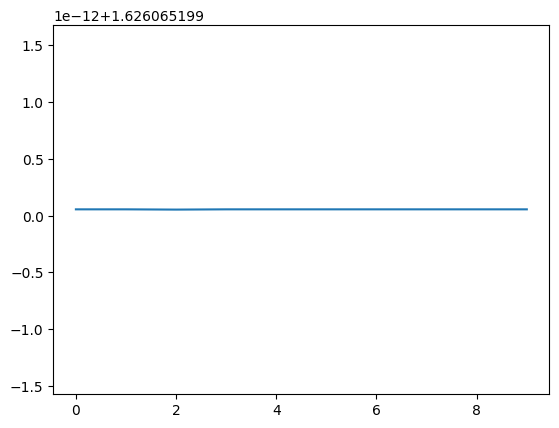

In [6]:
U = np.array(images_list[:3])

ITER = 10
snr = []

d = 3
m = 5

u0,x0,a0 = generate_mixed_sources(U,d,m)
[w1f, w1s, var] = initialize_w(d,m)

for i in range(ITER):
    for mixed in x0.T:
        x = relax (mixed, w1f, w1s, var, d, m)
        [w1f, w1s, var] = update_w(x, w1f, w1s,var)
    
    # Check all permutations and sign flips of rows to maximize SNR
    best_snr = -np.inf
    best_w1f = None

    for perm in permutations(range(d)):
        for signs in product([1, -1], repeat=d):
            # Apply permutation and sign flip
            W = w1f[list(perm), :] * np.array(signs)[:, None]
            approx_u0 = (W @ x0)
            snr_value = 10 * np.log10(np.linalg.norm(u0)**2 / np.linalg.norm(u0 - approx_u0)**2)
            if snr_value > best_snr:
                best_snr = snr_value
                best_w1f = W
    print(f"current best snr {i}: {best_snr}")
    snr.append(best_snr)

print(best_w1f @ a0)
print(snr)
plt.plot(snr)
plt.show()

current best snr 0: 24.550464744497788
[[ 0.99976591 -0.00781341  0.02017602]
 [-0.03172984  0.9984413   0.04591495]
 [-0.03802619  0.07403892  0.9965301 ]]
[24.550464744497788]


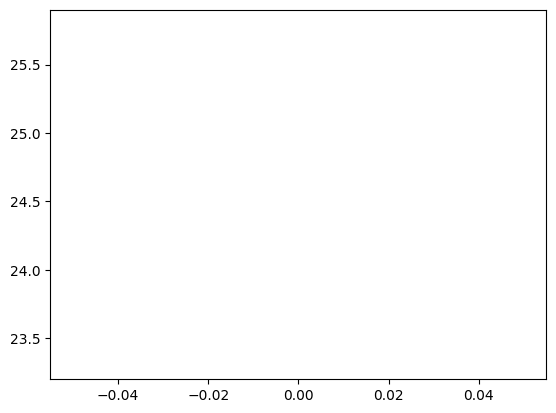

In [7]:
N = 500000
d = 3
m = 3
U = np.random.uniform(-np.sqrt(3), np.sqrt(3), size=(d,N))

ITER = 1
snr = []



u0,x0,a0 = generate_mixed_sources(U,d,m)
[w1f, w1s, var] = initialize_w(d,m)

for i in range(ITER):
    for mixed in x0.T:
        x = relax (mixed, w1f, w1s, var, d, m)
        [w1f, w1s, var] = update_w(x, w1f, w1s,var)
    
    # Check all permutations and sign flips of rows to maximize SNR
    best_snr = -np.inf
    best_w1f = None

    for perm in permutations(range(d)):
        for signs in product([1, -1], repeat=d):
            # Apply permutation and sign flip
            W = w1f[list(perm), :] * np.array(signs)[:, None]
            approx_u0 = (W @ x0)
            snr_value = 10 * np.log10(np.linalg.norm(u0)**2 / np.linalg.norm(u0 - approx_u0)**2)
            if snr_value > best_snr:
                best_snr = snr_value
                best_w1f = W
    print(f"current best snr {i}: {best_snr}")
    snr.append(best_snr)

print(best_w1f @ a0)
print(snr)
plt.plot(snr)
plt.show()